<h1><center>Практическая работа 6</center></h1>
<h1><center>Оценка потерь на трассе радиоканала в случает дифракции на цилиндре</center></h1>
<h4>Выполнил Дмитриев Егор ИКТУ-88 Вариант 3</h4>

### Цель работы: 
>Целью данной работы является ознакомление с механизмом дифракции радиосигала на цилиндре, в также принципами оценки величины потерь, вызываемых данным типом дифракции

### 1. Выбор значений по номеру варианта 
$ f = 1000 МГц; h_T = 58 м; h_R = 35м; a = 5км; b = 5км; H' = 62м; D_S = 21м $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

f = 1000
hT = 58
hR = 35
H = 62
Ds = 21

In [3]:
b = 5000
k = 1000
a = np.zeros(10,)
for i in range(10):
    a[i] = k
    k += 1000

In [5]:
Ldif_1 = np.zeros(10,)
Ldif_1_65 = np.zeros(10,)
d = np.zeros(10,)
lambd = (3*10**8)/(f*10**6)
for i in range(10):
    d_1 = (a[i]*10**-3)+(b*10**-3)
    h0 = ((a[i]*10**-3)*(d_1-(a[i]*10**-3)))/17
    H = H + h0
    d1 = math.sqrt(a[i]**2+(H-hT)**2)
    d2 = math.sqrt(b**2+(H-hR)**2)
    d[i] = d1+d2
    beta1 = math.asin(H/d1)
    beta2 = math.asin(H/d2)
    beta = beta1 + beta2
    alpha = (180*(math.pi/180))-beta
    r = (2*Ds*a[i]*b)/(alpha*((a[i]**2) + (b**2)))
    Lr = 11.7 * alpha * math.sqrt((math.pi*r)/lambd)
    h = H - (hT+a[i]*((hR-hT)/(a[i]+b)))
    v = h*math.sqrt((2/lambd)*(1/d1+1/d2))
    if (v > - 0.7):
        Lwdg = 6.9 + 20*math.log10(math.sqrt((v-0.1)**2+1)+v-0.1)
    else:
        Lwdg = 0
    
    Ldif_1[i] = Lwdg + Lr
    Ldif_1_65[i] = Lwdg + (Lr*0.65)
    print('Ldif_1 = ',Ldif_1[i], 'дБ')
    print('Ldif_1_65 = ',Ldif_1_65[i], 'дБ')

Ldif_1 =  200.47704754035783 дБ
Ldif_1_65 =  134.52414686976843 дБ
Ldif_1 =  266.0359967309918 дБ
Ldif_1_65 =  177.27862964051008 дБ
Ldif_1 =  300.2807692486158 дБ
Ldif_1_65 =  199.7242092769903 дБ
Ldif_1 =  315.8714767477426 дБ
Ldif_1_65 =  210.0530204613061 дБ
Ldif_1 =  320.3318156529839 дБ
Ldif_1_65 =  213.15303760705484 дБ
Ldif_1 =  318.4794011177971 дБ
Ldif_1_65 =  212.15603841547122 дБ
Ldif_1 =  313.26028016775786 дБ
Ldif_1_65 =  208.9769071953577 дБ
Ldif_1 =  306.40097533903815 дБ
Ldif_1_65 =  204.73725549587206 дБ
Ldif_1 =  298.88356295922614 дБ
Ldif_1_65 =  200.07440687461292 дБ
Ldif_1 =  291.25255764264676 дБ
Ldif_1_65 =  195.3410687291879 дБ


<function matplotlib.pyplot.show(close=None, block=None)>

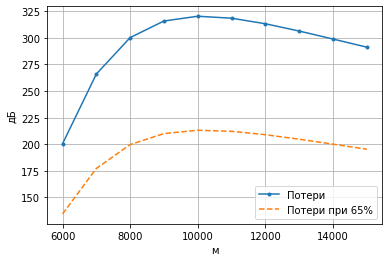

In [6]:
plt.plot(d, Ldif_1, '.-', label = 'Потери')
plt.plot(d, Ldif_1_65, '--', label = 'Потери при 65%')
plt.xlabel('м')
plt.ylabel('дБ')
plt.legend()
plt.grid()
plt.show

In [7]:
a = 5000
k = 1000
b = np.zeros(10,)
for i in range(10):
    b[i] = k
    k += 1000

In [8]:
Ldif_1 = np.zeros(10,)
Ldif_1_65 = np.zeros(10,)
d = np.zeros(10,)
lambd = (3*10**8)/(f*10**6)
for i in range(10):
    d_1 = (a*10**-3)+(b[i]*10**-3)
    h0 = ((a*10**-3)*(d_1-(a*10**-3)))/17
    H = H + h0
    d1 = math.sqrt(a**2+(H-hT)**2)
    d2 = math.sqrt(b[i]**2+(H-hR)**2)
    d[i] = d1+d2
    beta1 = math.asin(H/d1)
    beta2 = math.asin(H/d2)
    beta = beta1 + beta2
    alpha = (180*(math.pi/180))-beta
    r = (2*Ds*a*b[i])/(alpha*((a**2) + (b[i]**2)))
    Lr = 11.7 * alpha * math.sqrt((math.pi*r)/lambd)
    h = H - (hT+a*((hR-hT)/(a+b[i])))
    v = h*math.sqrt((2/lambd)*(1/d1+1/d2))
    if (v > - 0.7):
        Lwdg = 6.9 + 20*math.log10(math.sqrt((v-0.1)**2+1)+v-0.1)
    else:
        Lwdg = 0
    
    Ldif_1[i] = Lwdg + Lr
    Ldif_1_65[i] = Lwdg + (Lr*0.65)
    print('Ldif_1 = ',Ldif_1[i], 'дБ')
    print('Ldif_1_65 = ',Ldif_1_65[i], 'дБ')

Ldif_1 =  211.67964233922743 дБ
Ldif_1_65 =  145.93544726371263 дБ
Ldif_1 =  274.2085654378061 дБ
Ldif_1_65 =  185.61352095033277 дБ
Ldif_1 =  306.59543375687616 дБ
Ldif_1_65 =  206.1785399740467 дБ
Ldif_1 =  320.8891634051736 дБ
Ldif_1_65 =  215.19452305021096 дБ
Ldif_1 =  324.38173866221706 дБ
Ldif_1_65 =  217.31433621171564 дБ
Ldif_1 =  321.7773780036815 дБ
Ldif_1_65 =  215.5552420518483 дБ
Ldif_1 =  315.95848722896824 дБ
Ldif_1_65 =  211.7679233241746 дБ
Ldif_1 =  308.6124701511115 дБ
Ldif_1_65 =  207.03450149735028 дБ
Ldif_1 =  300.69562213967436 дБ
Ldif_1_65 =  201.9662428011288 дБ
Ldif_1 =  292.73445374243073 дБ
Ldif_1_65 =  196.89763753935975 дБ


<function matplotlib.pyplot.show(close=None, block=None)>

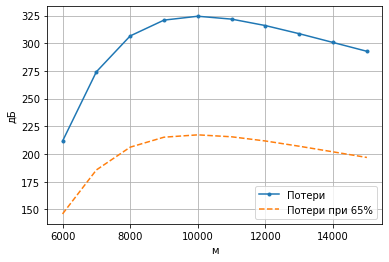

In [9]:
plt.plot(d, Ldif_1, '.-', label = 'Потери')
plt.plot(d, Ldif_1_65, '--', label = 'Потери при 65%')
plt.xlabel('м')
plt.ylabel('дБ')
plt.legend()
plt.grid()
plt.show